# K-Means Clustering using Scikit-Learn

# By Chinmay Patil

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Preparing the data 
Here we use the inbuild iris dataset from scikit-learn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
df['target'] = y
df['target'].replace(0,'setosa',inplace=True)
df['target'].replace(1,'versicolor',inplace=True)
df['target'].replace(2,'virginica',inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Total number of elements in the dataset
df.shape

(150, 5)

## Finding the optimum number of clusters for K-Means Clustering Algorithm
Here we find the optimum number of clusters for using in K-Means Clustering Algorithm. We use the elbow method for finding the optimum number of clusters. We run the K-Means Clustering Algorithm by changing number of clusters from 1 to 10. After plotting the amount of cluster against the inertia values we get the elbow graph.

In [4]:
from sklearn.cluster import KMeans
inertia_values = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    


Text(0.5, 1.0, 'Number of clusters vs inertia values')

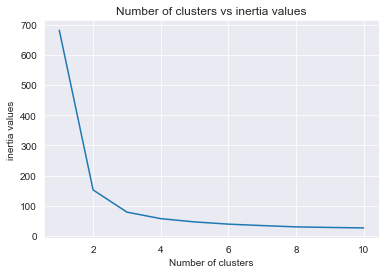

In [5]:
sns.set_style('darkgrid')
sns.lineplot(range(1,11),inertia_values)
plt.xlabel('Number of clusters')
plt.ylabel('inertia values')
plt.title('Number of clusters vs inertia values')

From the graph it can be clearly seen that the elbow appears at number of clusters = 3.
Therefore the optimum number of clusters for this dataset is 3

## Training the KMeans model with number of clusters = 3
Train and fit the model with number of clusters = 3 and then predict the clusters for the dataset

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## Visualizing the clusters
We visualize the dataset and the cluster centers using seaborn library to see how the clusters are formed

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

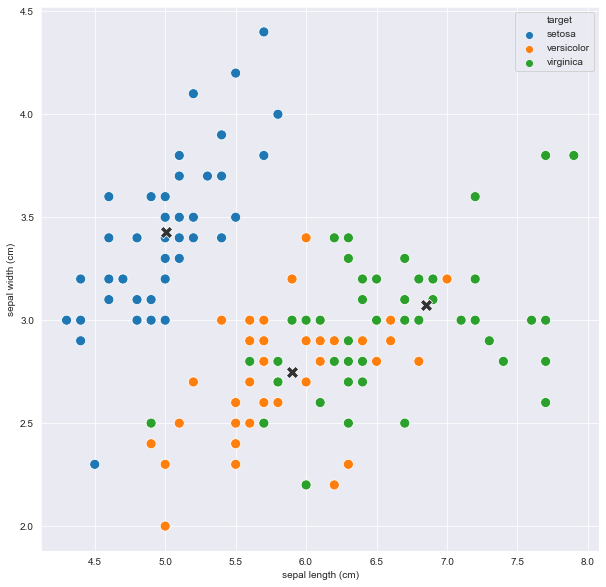

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(df['sepal length (cm)'],df['sepal width (cm)'], hue=df['target'],s=100)
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='X',s=150,color='0.2')